# Detección de valores atípicos

Q1: 205.0
Q3: 735.5
IQR: 530.5
Límite inferior: -590.75
Límite superior: 1531.25

Transacciones anómalas detectadas:
    ID  Monto  Outlier
18  19   1800     True
19  20   2500     True


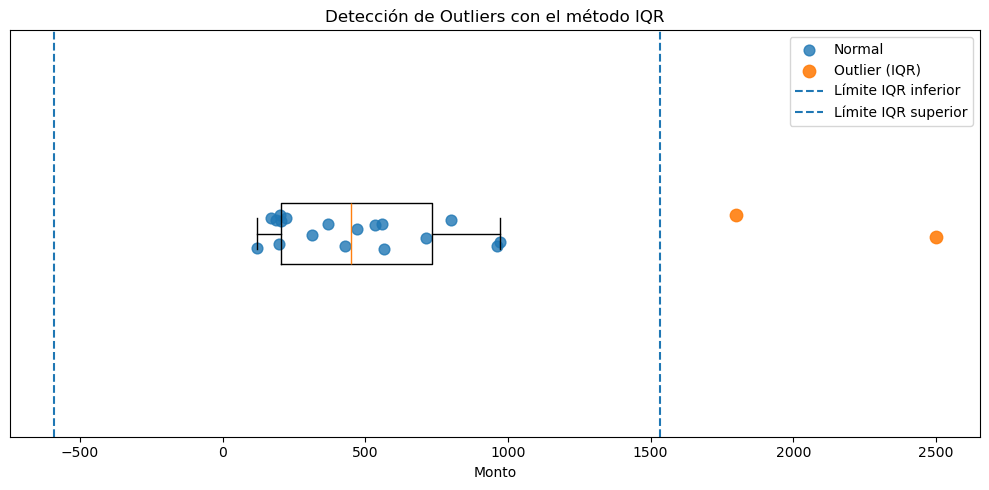

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# carga de datos

df = pd.read_csv("transacciones.csv")

# calculo de IQR y límites

Q1 = df["Monto"].quantile(0.25)
Q3 = df["Monto"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

# marco outliers según IQR

df["Outlier"] = (df["Monto"] < limite_inferior) | (df["Monto"] > limite_superior)

print("\nTransacciones anómalas detectadas:")
print(df[df["Outlier"]])

# grafico

fig, ax = plt.subplots(figsize=(10, 5))

ax.boxplot(
    df["Monto"],
    vert=False,
    showfliers=False
)

# preparo puntos para el scatter

y_base = np.ones(len(df))
# pequeño jitter para que no se pisen exactamente en la misma línea
y_jitter = y_base + (np.random.rand(len(df)) - 0.5) * 0.1

mask_out = df["Outlier"]
mask_in = ~df["Outlier"]

# puntos normales

ax.scatter(df.loc[mask_in, "Monto"],
           y_jitter[mask_in],
           s=60,
           alpha=0.8,
           label="Normal")

# puntos outliers según IQR

ax.scatter(df.loc[mask_out, "Monto"],
           y_jitter[mask_out],
           s=80,
           alpha=0.9,
           label="Outlier (IQR)")

# líneas verticales
ax.axvline(limite_inferior, linestyle="--", linewidth=1.5, label="Límite IQR inferior")
ax.axvline(limite_superior, linestyle="--", linewidth=1.5, label="Límite IQR superior")

ax.set_title("Detección de Outliers con el método IQR")
ax.set_xlabel("Monto")
ax.set_yticks([])
ax.legend()

plt.tight_layout()
plt.show()
